Import Libraries

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
from numpy import unique
from numpy import where
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn import preprocessing
import scipy.cluster.hierarchy as shc
import plotly.express as px

Fetch Data

In [2]:
uploaded = files.upload()

Saving Indian_IPO_Data.csv to Indian_IPO_Data.csv


Explanation : The file of "Indian_IPO_Data.csv" is uploaded

Create Raw Dataframe

In [3]:
raw_df = pd.read_csv('Indian_IPO_Data.csv')

Define Constant Variable

In [4]:
# LIST OF ATTRIBUTES THAT ARE RELEVANT FOR CLUSTERING
selected_list = ['Srno','Company_Name','Face_Value','Bid_Price_From','Bid_Price_To','Market_Lot','NSE_Listing_day_open','NSE_Listing_day_low','NSE_Listing_day_high','NSE_Listing_day_last_trade','NSE_Listing_day_volume','NSE_SME_Listing_day_open','NSE_SME_Listing_day_low','NSE_SME_Listing_day_high','NSE_SME_Listing_day_last_trade','NSE_SME_Listing_day_volume','BSE_Listing_day_open','BSE_Listing_day_low','BSE_Listing_day_high','BSE_Listing_day_last_trade','BSE_Listing_day_volume','BSE_SME_Listing_day_open','BSE_SME_Listing_day_low','BSE_SME_Listing_day_high','BSE_SME_Listing_day_last_trade','BSE_SME_Listing_day_volume']
# LIST OF ATTRIBUTES THAT ARE RELEVANT FOR BIDDING PRICE
bid_average_list = ['Bid_Price_From', 'Bid_Price_To']
# LIST OF ATTRIBUTES THAT ARE RELEVANT FOR OPENING PRICE
open_average_list = ['NSE_Listing_day_open', 'NSE_SME_Listing_day_open','BSE_Listing_day_open','BSE_SME_Listing_day_open']
# LIST OF ATTRIBUTES THAT ARE RELEVANT FOR CLOSING PRICE
close_average_list = ['NSE_Listing_day_last_trade', 'NSE_SME_Listing_day_last_trade','BSE_Listing_day_last_trade','BSE_SME_Listing_day_last_trade']
# LIST OF ATTRIBUTES THAT ARE RELEVANT FOR HIGH ON FIRST DAY OF LISTING
high_average_list = ['NSE_Listing_day_high', 'NSE_SME_Listing_day_high','BSE_Listing_day_high','BSE_SME_Listing_day_high']
# LIST OF ATTRIBUTES THAT ARE RELEVANT FOR LOW ON FIRST DAY OF LISTING
low_average_list = ['NSE_Listing_day_low', 'NSE_SME_Listing_day_low','BSE_Listing_day_low','BSE_SME_Listing_day_low']
# LIST OF ATTRIBUTES THAT ARE RELEVANT FOR OVERALL VOLUME IN MARKET
volume_average_list = ['NSE_Listing_day_volume', 'NSE_SME_Listing_day_volume','BSE_Listing_day_volume','BSE_SME_Listing_day_volume']

# LIST OF ATTRIBUTES THAT ARE AFFECTING STOCK PERFORMANCE OVERALL
summarised_feature_columns = ['Bid_Price_Average','Open_Price_Average','High_Price_Average','Low_Price_Average','Close_Price_Average','Volume_Average','Profit_Margin']
# LIST OF ATTRIBUTES THAT ARE MOST PROMINENT FOR AFFECTING STOCK PERFORMANCE
selected_summarised_feature_columns = [summarised_feature_columns[0],summarised_feature_columns[6]]
scaler = preprocessing.MinMaxScaler()

Filter Raw Dataframe

In [5]:
# DATAFRAME IS SELECTED ONLY FOR RELEVANT ATTRIBUTES
selected_df = raw_df.filter(selected_list, axis=1)

Pre-Process Data 


In [6]:
# AMPUTING NAN WITH 0
selected_df = selected_df.replace(np.NaN,float(0))

# PRE-PROCESSING ATTRIBUTE FOR TYPE CASTING INTO FLOAT
selected_df['NSE_Listing_day_open'] = [float(str(i).replace(",", "")) for i in selected_df['NSE_Listing_day_open']]
selected_df['BSE_Listing_day_open'] = [float(str(i).replace(",", "")) for i in selected_df['BSE_Listing_day_open']]
selected_df['NSE_Listing_day_last_trade'] = [float(str(i).replace(",", "")) for i in selected_df['NSE_Listing_day_last_trade']]
selected_df['BSE_Listing_day_last_trade'] = [float(str(i).replace(",", "")) for i in selected_df['BSE_Listing_day_last_trade']]
selected_df['NSE_Listing_day_high'] = [float(str(i).replace(",", "")) for i in selected_df['NSE_Listing_day_high']]
selected_df['BSE_Listing_day_high'] = [float(str(i).replace(",", "")) for i in selected_df['BSE_Listing_day_high']]
selected_df['NSE_Listing_day_low'] = [float(str(i).replace(",", "")) for i in selected_df['NSE_Listing_day_low']]
selected_df['BSE_Listing_day_low'] = [float(str(i).replace(",", "")) for i in selected_df['BSE_Listing_day_low']]

Explanation : Dataset contains data about various IPO features that are completely unrelated to other IPO. Hence, Imputation of dataset had been done as 0 rather than mean/median.

Create Average_Bid_Price Column

In [7]:
# FINDING AVERAGE VALUE OF BIDDING PRICE AND SCALING IT ACCORDINGLY
selected_df[summarised_feature_columns[0]] = selected_df[bid_average_list].mean(axis=1)
selected_df[summarised_feature_columns[0]] = scaler.fit_transform(selected_df[[summarised_feature_columns[0]]])

Create Average_Open_Price Column

In [8]:
# FINDING AVERAGE VALUE OF OPENING PRICE AND SCALING IT ACCORDINGLY
selected_df[summarised_feature_columns[1]] = selected_df[open_average_list].mean(axis=1)
selected_df[summarised_feature_columns[1]] = scaler.fit_transform(selected_df[[summarised_feature_columns[1]]])

Create Average_High_Price Column

In [9]:
# FINDING AVERAGE VALUE OF HIGH PRICE ON LISTING DAY AND SCALING IT ACCORDINGLY
selected_df[summarised_feature_columns[2]] = selected_df[high_average_list].mean(axis=1)
selected_df[summarised_feature_columns[2]] = scaler.fit_transform(selected_df[[summarised_feature_columns[2]]])

Create Average_Low_Price Column

In [10]:
# FINDING AVERAGE VALUE OF LOW PRICE ON LISTING DAY AND SCALING IT ACCORDINGLY
selected_df[summarised_feature_columns[3]] = selected_df[low_average_list].mean(axis=1)
selected_df[summarised_feature_columns[3]] = scaler.fit_transform(selected_df[[summarised_feature_columns[3]]])

Create Average_Close_Price Column

In [11]:
# FINDING AVERAGE VALUE OF CLOSING PRICE(LAST TRADE PRICE) ON LISTING DAY AND SCALING IT ACCORDINGLY
selected_df[summarised_feature_columns[4]] = selected_df[close_average_list].mean(axis=1)
selected_df[summarised_feature_columns[4]] = scaler.fit_transform(selected_df[[summarised_feature_columns[4]]])

Create Total_Volume Column

In [12]:
# FINDING TOTAL VOLUME OF STOCK AS ON LISTING DAY IN MARKET AND SCALING IT ACCORDINGLY
selected_df[[summarised_feature_columns[5]]] = selected_df[volume_average_list].sum(axis=1)
selected_df[summarised_feature_columns[5]] = scaler.fit_transform(selected_df[[summarised_feature_columns[5]]])

Expalnation :

Average Price for Each of Open, High, Low, Last Trade(Close) are calculated as (corresponding value for NSE + NSE_SME + BSE + BSE_SME) / (1 or 2 based on non null values in above parameters)

Ex: Average Open Price = (NSE_OPEN + NSE_SME_OPEN + BSE_OPEN + BSE_SME_OPEN) / (1 or 2)

Create Profit Margin Column

In [13]:
# FINDING PROFIT MARGIN ON LISTING DAY AND SCALING IT ACCORDINGLY
selected_df[summarised_feature_columns[6]] = selected_df[['Bid_Price_Average','Open_Price_Average']].pct_change(axis=1)['Open_Price_Average']
selected_df[summarised_feature_columns[6]] = selected_df[summarised_feature_columns[6]].replace([np.inf,np.nan],float(0))
selected_df[summarised_feature_columns[6]] = scaler.fit_transform(selected_df[[summarised_feature_columns[6]]])

Explaination :

Profit Margin = (Average Opening Price - Average Bid Price) / Average Bid Price

Finding Optimum Value for "K" using Elbow method

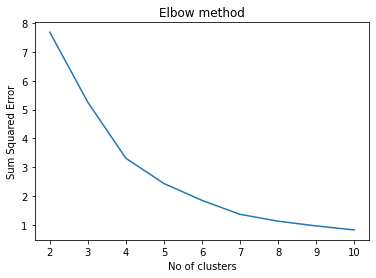

In [14]:
# COMPARING ERROR TO NUMBER OF CLUSTER USING KMEANS [VISUALLY] TO UNDERSTAND OPTIMUM VALUE FOR "K"
x = selected_df[selected_summarised_feature_columns].iloc[:,:].values
sum_sq_dist =[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    sum_sq_dist.append(kmeans.inertia_)
pyplot.plot(range(2, 11), sum_sq_dist)
pyplot.title('Elbow method')
pyplot.xlabel('No of clusters')
pyplot.ylabel('Sum Squared Error')
pyplot.show()

Explanation : 

Elbow method shows the significant decrease in error compared to value of K (Number of clusters), Here value of optimum K can be 3,4,5 afterwards error rate seems quite normal and change is insignificant to varying value of "K".

Silhouette Score

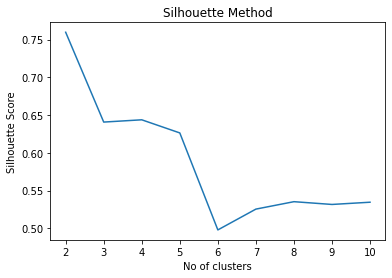

In [15]:
silhouette = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(x)
  labels = kmeans.labels_
  silhouette.append(silhouette_score(x, labels))
pyplot.plot(range(2, 11), silhouette)
pyplot.title('Silhouette Method')
pyplot.xlabel('No of clusters')
pyplot.ylabel('Silhouette Score')
pyplot.show()

Explaination : 

Silhouette score is favourable for value of K as 2, 3, 4 and 5, however it drops significantly for K = 6

Dendogram

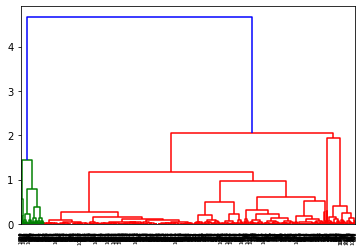

In [16]:
# CREATING DENDOGRAM FOR UNDERSTANDING CLUSTERING PROCESS AT EACH STEPS
Dendrogram = shc.dendrogram((shc.linkage(selected_df[selected_summarised_feature_columns], method ='ward')))

In [17]:
# SELECTING RANGE OF OPTIMUM VALUES FOR "K" BASED ON ELBOW METHOD AND SILHOUETTE
optimum_k = [3,4,5]

Explanation :

Optimum value are selected based on value of K obtained by results of Elbow method and silhouette method collectively

Agglomerative Clustering

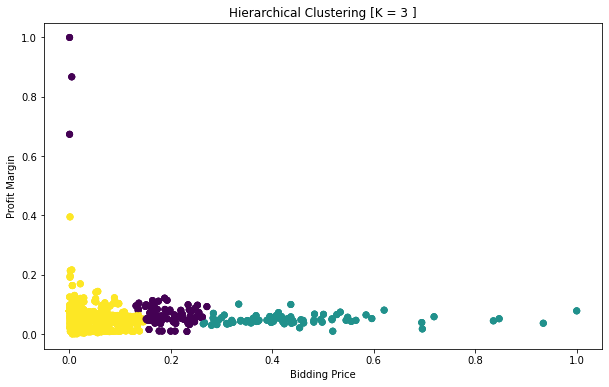

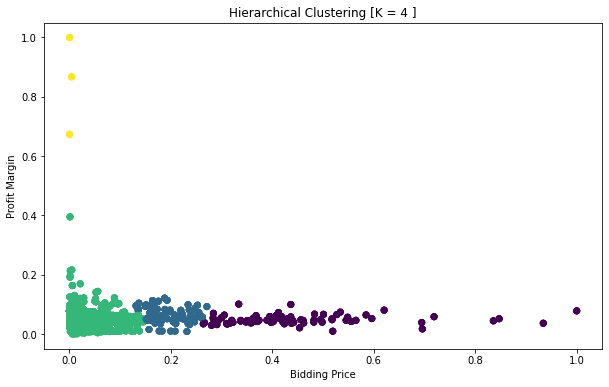

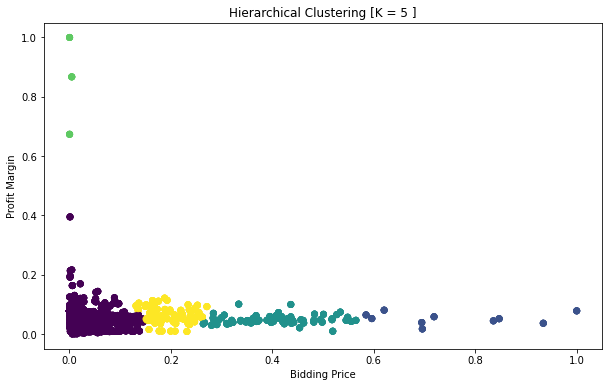

In [18]:
# APPLYING AND VISUALISING DATA FOR AGGLOMERATIVE CLUSTERING ALGORITHM FOR VARIOUS VALUES OF "K"
for i in optimum_k:

  pyplot.figure(figsize =(10, 6))
  model = AgglomerativeClustering(n_clusters=i)
  y_predicted = model.fit_predict(selected_df[selected_summarised_feature_columns])
  clusters = unique(y_predicted)

  for cluster in clusters:
    row_ix = where(y_predicted == cluster)
    pyplot.scatter(selected_df[selected_summarised_feature_columns[0]], selected_df[selected_summarised_feature_columns[1]],c=model.labels_.astype(float))
  pyplot.title('Hierarchical Clustering [K = '+ str(i) +' ]')
  pyplot.xlabel('Bidding Price')
  pyplot.ylabel('Profit Margin')
  pyplot.show()

Explanation : 

clusters = unique(y_predicted) stores all unique value of predicted (Here it can be considered as Cluster Class)

y_predicted = model.fit_predict(selected_df[selected_summarised_feature_columns]) predicts the value of Cluster Class based on selected attributes

BIRCH Clustering

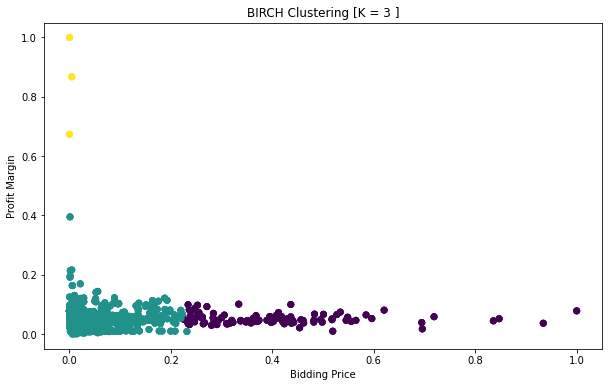

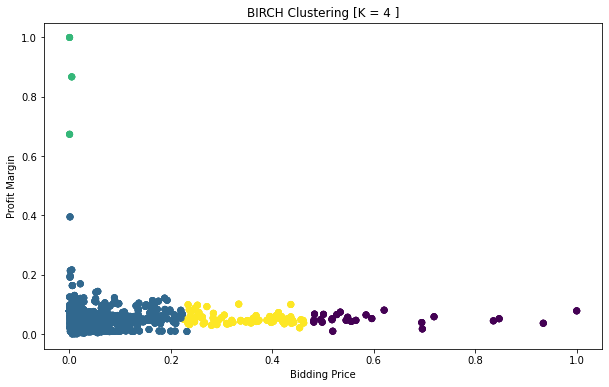

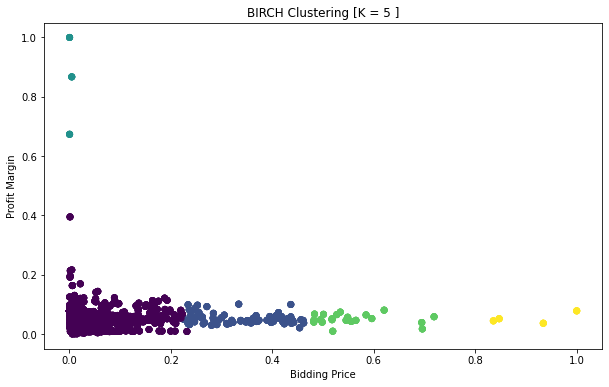

In [25]:
# APPLYING AND VISUALISING DATA FOR BIRCH CLUSTERING ALGORITHM FOR VARIOUS VALUES OF "K"
for i in optimum_k:

  pyplot.figure(figsize =(10, 6))
  model = Birch(threshold=0.01, n_clusters=i)
  y_predicted = model.fit_predict(selected_df[selected_summarised_feature_columns])
  clusters = unique(y_predicted)

  for cluster in clusters:
    row_ix = where(y_predicted == cluster)
    pyplot.scatter(selected_df[selected_summarised_feature_columns[0]], selected_df[selected_summarised_feature_columns[1]],c=model.labels_.astype(float))
  pyplot.title('BIRCH Clustering [K = '+ str(i) +' ]')
  pyplot.xlabel('Bidding Price')
  pyplot.ylabel('Profit Margin')
  pyplot.show()

K-Means Clustering

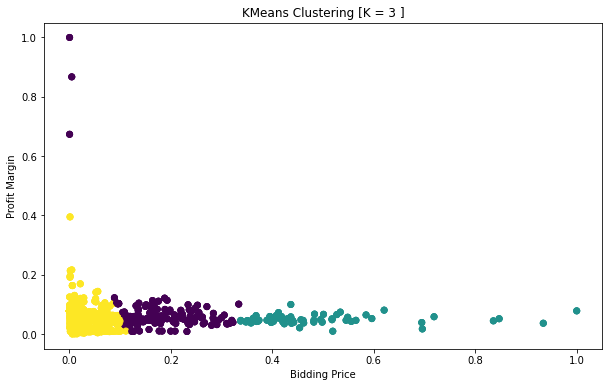

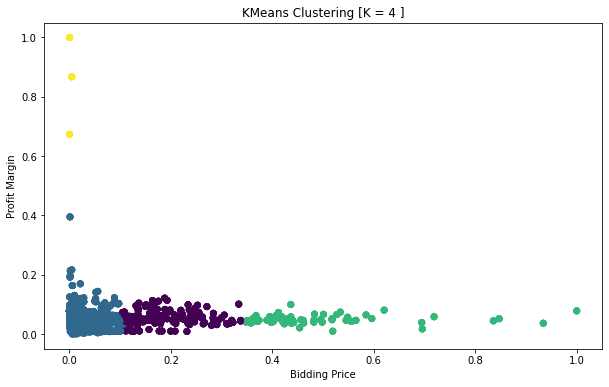

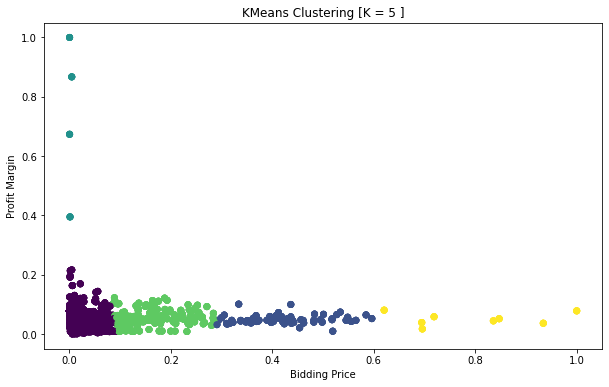

In [26]:
# APPLYING AND VISUALISING DATA FOR KMEANS CLUSTERING ALGORITHM FOR VARIOUS VALUES OF "K"
for i in optimum_k:

  pyplot.figure(figsize =(10, 6))
  model = KMeans(n_clusters=i)
  y_predicted = model.fit_predict(selected_df[selected_summarised_feature_columns])
  clusters = unique(y_predicted)

  for cluster in clusters:
    row_ix = where(y_predicted == cluster)
    pyplot.scatter(selected_df[selected_summarised_feature_columns[0]], selected_df[selected_summarised_feature_columns[1]],c=model.labels_.astype(float))
  pyplot.title('KMeans Clustering [K = '+ str(i) +' ]')
  pyplot.xlabel('Bidding Price')
  pyplot.ylabel('Profit Margin')
  pyplot.show()

In [21]:
# APPLYING AND VISUALISING DATA FOR KMEANS CLUSTERING ALGORITHM [OVER MULTIPLE FEATURES] FOR VARIOUS VALUES OF "K"
cluster_list = []
for i in optimum_k:

  model = KMeans(n_clusters=i)
  model.fit(selected_df[summarised_feature_columns])

  clusters=pd.DataFrame(selected_df[summarised_feature_columns],columns=summarised_feature_columns)
  clusters['label']=model.labels_
  polar=clusters.groupby("label").mean().reset_index()
  polar=pd.melt(polar,id_vars=["label"])
  fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True, title= 'Line Polar for K = '+ str(i),height=400,width=400)
  fig4.show()
  cluster_list.append([clusters,i])

Explanation : 

In order to understand clustering of data in higher dimension line polar method are used for data visualisation

In [22]:
# VISUALISING DATA FOR STAKE OF EACH CLUSTER
color_list = ['blue','red','green','purple','orange']
for clusters in cluster_list:
  pie=clusters[0].groupby('label').size().reset_index()
  pie.columns=['label','value']
  fig = px.pie(pie,values='value',names='label',color=color_list[:clusters[1]],title='Pie Chart for K = '+ str(clusters[1]),height=300,width=300)
  fig.show()

Explanation : 

Above Pie charts depicts the contribution of types of IPO till date in each category